# Assignment 2 

### Mohammad Kashif Siddiqui - 0755452

### Initializing & Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense


In [3]:
# Read in Car_sales.csv
car = pd.read_csv('car_sales.csv')

### Exploring Data

In [4]:
print(car.info())
car.head()
car.tail()
#pd.isnull(car)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
Age         963 non-null int64
Gender      963 non-null int64
Mile/Day    963 non-null int64
Debt        963 non-null int64
Income      963 non-null int64
Sale        963 non-null int64
dtypes: int64(6)
memory usage: 45.3 KB
None


,Age,Gender,Mile/Day,Debt,Income,Sale
958,22,0,11,8778,9829,1593
959,19,1,23,4850,3470,4742
960,28,1,28,9312,2720,12771
961,50,0,29,51343,8713,28511
962,47,1,15,3735,6406,6104


In [60]:
#bin_labels = ['1', '2', '3', '4', '5']
#car['Sale_category'] = pd.qcut(car['Sale'],
#                              q=[0, .2, .4, .6, .8, 1],
#                              labels=bin_labels)
#car.head()

In [5]:
car.head()

,Age,Gender,Mile/Day,Debt,Income,Sale
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


### Visualizing Data

(array([39., 13., 75., 38., 47., 34., 36., 48., 47., 52., 77., 63., 70.,
        59., 43., 44., 47., 44., 44., 43.]),
 array([    0. ,   598.5,  1197. ,  1795.5,  2394. ,  2992.5,  3591. ,
         4189.5,  4788. ,  5386.5,  5985. ,  6583.5,  7182. ,  7780.5,
         8379. ,  8977.5,  9576. , 10174.5, 10773. , 11371.5, 11970. ]),
 <a list of 20 Patch objects>)

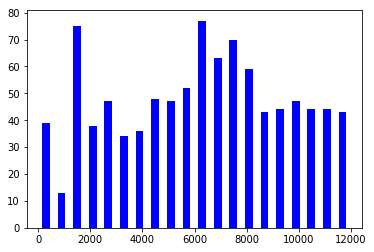

In [72]:
plt.figure()

plt.hist(car.Income, 20, facecolor = 'blue', alpha=1, label = 'Income', rwidth=0.5)

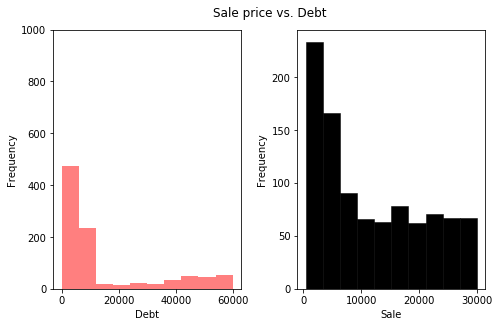

In [59]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(car.Debt, 10, facecolor='red', alpha=0.5, label="debt")
ax[1].hist(car.Sale, 10, facecolor='black', ec="black", lw=0.5, alpha=1, label="price")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.9, hspace=0.05, wspace=0.3)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Debt")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Sale")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Sale price vs. Debt")

plt.show()

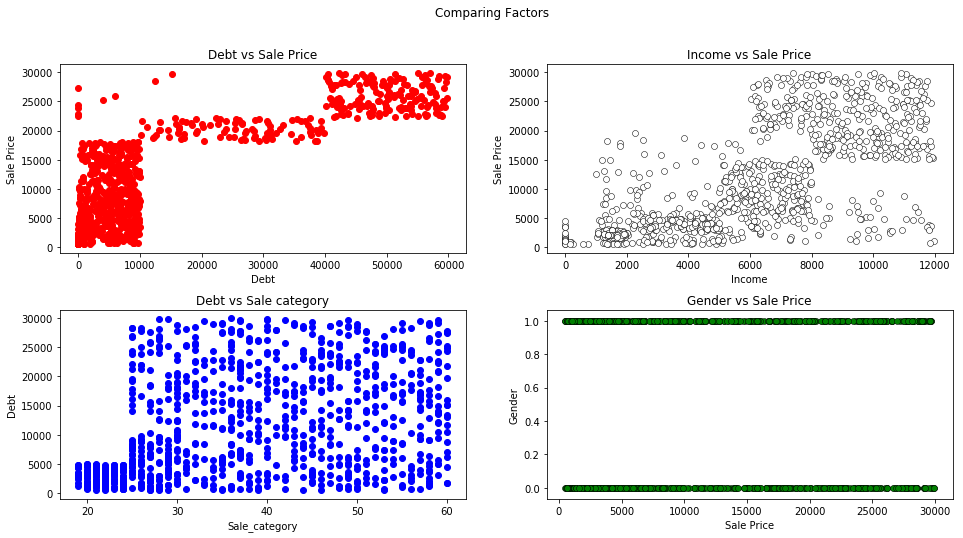

In [6]:

fig, ax = plt.subplots(2,2,figsize=(16, 8))

ax[0,0].scatter(car['Debt'], car["Sale"], color="red")
ax[0,1].scatter(car['Income'], car['Sale'], color="white", edgecolors="black", lw=0.5)
ax[1,0].scatter(car['Age'],car["Sale"], color="blue")
ax[1,1].scatter(car['Sale'],car['Gender'],  color="green", edgecolors="black", lw=0.5)

ax[0,0].set_title("Debt vs Sale Price")
ax[0,1].set_title("Income vs Sale Price")
ax[0,0].set_xlabel("Debt")
ax[0,1].set_xlabel("Income")
ax[0,0].set_ylabel("Sale Price")
ax[0,1].set_ylabel("Sale Price")

ax[1,0].set_title("Debt vs Sale category")
ax[1,1].set_title("Gender vs Sale Price")
ax[1,0].set_ylabel("Debt")
ax[1,1].set_ylabel("Gender")
ax[1,0].set_xlabel("Sale_category")
ax[1,1].set_xlabel("Sale Price")

#ax[0].set_xlim([0, 60000])
#ax[1].set_xlim([0,30000])
#ax[0].set_ylim([0,600])
#ax[1].set_ylim([])
fig.subplots_adjust(wspace=0.2, hspace = 0.3)
fig.suptitle("Comparing Factors")

plt.show()

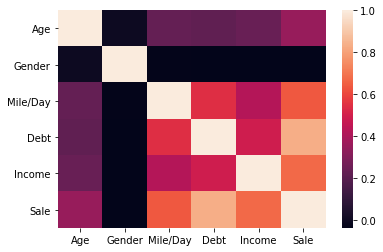

In [9]:
corr = car.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Train & Test Split

In [33]:
#temp= car.pop('Sale')

In [10]:
car.head()

,Age,Gender,Mile/Day,Debt,Income,Sale
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [7]:
#temp = car.drop('Sale',axis=1)
#y = car['Sale']

# Specify the data 
X=car.iloc[:,0:5]

# Isolate target labels
y = car.Sale

# Specify the target labels and flatten the array 
X = car.drop('Sale', axis=1) 

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
X_train

,Age,Gender,Mile/Day,Debt,Income
72,50,0,88,53232,7854
526,56,1,20,4153,8278
44,38,1,28,5110,2818
572,20,1,17,9143,1342
198,29,1,17,0,4443
...,...,...,...,...,...
106,23,0,13,8746,2650
270,58,0,16,547,1148
860,55,0,34,42643,8390
435,55,1,37,41027,8230


### Pre-Processing Data

In [28]:
# Scale the train set
X_train = StandardScaler().fit_transform(X_train)

# Scale the test set
X_test = StandardScaler().fit_transform(X_test)


In [9]:
X_train

,Age,Gender,Mile/Day,Debt,Income
72,50,0,88,53232,7854
526,56,1,20,4153,8278
44,38,1,28,5110,2818
572,20,1,17,9143,1342
198,29,1,17,0,4443
...,...,...,...,...,...
106,23,0,13,8746,2650
270,58,0,16,547,1148
860,55,0,34,42643,8390
435,55,1,37,41027,8230


In [10]:
X_test

,Age,Gender,Mile/Day,Debt,Income
529,32,0,23,54618,11548
342,39,0,22,0,7769
352,45,1,20,36043,11711
819,52,1,18,9865,5563
277,59,0,20,736,5216
...,...,...,...,...,...
479,19,0,23,61,10541
912,24,1,14,4311,1164
803,55,0,28,6564,10795
599,35,0,23,688,4298


### Building Model

In [ ]:
## THIS METHOD doesn't work... keeps giving error about tensorflow not having some attributes

# Import `Sequential` from `keras.models`
#from keras.models import Sequential

# Import `Dense` from `keras.layers`
#from keras.layers import Dense

# Initialize the model
#model = keras.Sequential()

# Add input layer 
#model.add(Dense(64, input_dim=12, activation='relu'))
    
# Add output layer 
#model.add(Dense(1))

In [11]:
from sklearn.model_selection import StratifiedKFold

seed = 89
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu",input_shape=(5,), name="layer1"),
        layers.Dense(25, activation="relu", name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)
# Call model on a test input
#x = tf.ones((3, 3))
#y = model(x)

In [12]:
model.output_shape

(None, 1)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                384       
_________________________________________________________________
layer2 (Dense)               (None, 25)                1625      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 26        
Total params: 2,035
Trainable params: 2,035
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 5),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'layer1',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'layer2',
    'trainable': True,
    'units': 25,
    'use_bias': 

In [15]:
model.get_weights()

[array([[-1.60452887e-01,  2.53539085e-01, -2.31895030e-01,
         -1.40994772e-01, -2.40836889e-01,  1.35319680e-01,
          2.61164129e-01,  2.63411880e-01, -2.65718818e-01,
          1.17525637e-01,  2.80524075e-01, -1.81432769e-01,
          1.23723298e-01, -1.76448524e-02,  2.76143193e-01,
          2.45226681e-01, -1.50452256e-02,  2.68728793e-01,
          1.30683571e-01,  3.84458899e-02, -1.01343781e-01,
          2.29353487e-01, -4.80365753e-03,  6.61716759e-02,
         -2.13064194e-01,  7.72610903e-02, -1.57816842e-01,
         -5.94788492e-02, -2.91043878e-01, -2.48605669e-01,
         -4.06778753e-02, -1.81217343e-01,  1.27759695e-01,
         -1.01800412e-01, -1.62156820e-02, -6.10344410e-02,
          1.63562715e-01, -2.24927306e-01, -2.48421550e-01,
          2.24245787e-01, -1.07447520e-01, -1.17540359e-04,
         -2.28533715e-01,  2.87287951e-01,  9.92991328e-02,
          3.39137018e-02, -1.28474221e-01, -1.55309737e-02,
          3.27143371e-02,  2.64297366e-0

### Compile & Fit

In [54]:
model.compile(loss='mse',
              optimizer='rmsprop',
              metrics=['mae', 'mse'])
                   
model.fit(X_train, y_train,epochs=1000, batch_size=50, verbose=1)

Train on 866 samples
Epoch 1/1000
866/866 [==============================] - 0s 420us/sample - loss: 10906604.0139 - mae: 2492.4050 - mse: 10906604.0000
Epoch 2/1000
866/866 [==============================] - 0s 32us/sample - loss: 10243627.4896 - mae: 2411.6121 - mse: 10243628.0000
Epoch 3/1000
866/866 [==============================] - 0s 32us/sample - loss: 10553611.0485 - mae: 2441.3752 - mse: 10553611.0000
Epoch 4/1000
866/866 [==============================] - 0s 33us/sample - loss: 10255411.1432 - mae: 2401.1284 - mse: 10255411.0000
Epoch 5/1000
866/866 [==============================] - 0s 33us/sample - loss: 10133902.5785 - mae: 2415.9106 - mse: 10133902.0000
Epoch 6/1000
866/866 [==============================] - 0s 35us/sample - loss: 10270010.6801 - mae: 2412.3652 - mse: 10270009.0000
Epoch 7/1000
866/866 [==============================] - 0s 31us/sample - loss: 10207894.3614 - mae: 2400.6309 - mse: 10207894.0000
Epoch 8/1000
866/866 [==============================] - 0s 33

### Prediction

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([[25323.8    ],
       [ 5777.979  ],
       [21115.357  ],
       [ 8631.247  ],
       [ 4887.031  ],
       [20767.045  ],
       [19815.72   ],
       [13343.432  ],
       [29501.373  ],
       [ 2035.8146 ],
       [ 9476.813  ],
       [15906.105  ],
       [ 3696.508  ],
       [ 6434.801  ],
       [ 1226.0231 ],
       [ 6373.327  ],
       [23818.068  ],
       [ 5195.4883 ],
       [11254.227  ],
       [18873.117  ],
       [ 5325.9766 ],
       [ 6603.291  ],
       [  512.41077],
       [ 5405.026  ],
       [14090.494  ],
       [23435.34   ],
       [ -397.04645],
       [13631.487  ],
       [ 6638.1816 ],
       [  -80.46988],
       [ 4136.246  ],
       [10608.618  ],
       [16252.521  ],
       [10645.281  ],
       [ 9709.035  ],
       [ 7073.254  ],
       [ 4319.7124 ],
       [22466.533  ],
       [14046.562  ],
       [ 7248.88   ],
       [ 1434.9363 ],
       [ 7830.2227 ],
       [ 5563.3203 ],
       [ 4599.9043 ],
       [ 3489.7297 ],
       [21

In [57]:
y_test

529    26713
342     1147
352    21566
819     7596
277    12083
       ...  
479     2819
912     4523
803    15769
599     5277
382     6191
Name: Sale, Length: 97, dtype: int64

In [58]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

97/97 [==============================] - 0s 783us/sample - loss: 14317839.8969 - mae: 2740.1863 - mse: 14317841.0000
[14317839.896907216, 2740.1863, 14317841.0]


### Model Validation

In [59]:
mse_value = model.evaluate(X_test, y_test, verbose=0)

print(mse_value)

[14317839.896907216, 2740.1863, 14317841.0]


In [60]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8256310865746249

##### 0.8256310865746249 r2_score if data is not scaled
##### 0.7903243245434892 r2_score if data is scaled

# Assignment 2 Questions

### Q1. What is your strategy for designing the number of neurons and the number of hidden layer?

#### Since the data is very sparse, it is best to use very few layers with the minimum possible number of neurons in each layer to optimize the r2_score without overfitting.

### Q2. How to optimize the weights?

#### I tried to initialize with random weights so that we don't have all the same weights when starting out. Additionally, using dropout layers to randomly forget information to better optimize weights is a good strategy, but in this model adding a dropout layer made no difference.

### Q3. Your choice of loss functions an optimizer?

#### I utilized a couple of loss functions and optimizers as studied in Assignment 1, but settled on the mse and rmsprop as being the ones that were best able to achieve the highest score and also work with the type of data (continuous) needed at the output.

### Q4. Your proposed architecture?

#### See above model.summary()

##### Model: "sequential"
##### _________________________________________________________________
##### Layer (type)                 Output Shape              Param #   
##### =================================================================
##### layer1 (Dense)               (None, 64)                384       
##### _________________________________________________________________
##### layer2 (Dense)               (None, 25)                1625      
##### _________________________________________________________________
##### layer3 (Dense)               (None, 1)                 26        
##### =================================================================
##### Total params: 2,035
##### Trainable params: 2,035
##### Non-trainable params: 0
##### _________________________________________________________________

### Q5. Why you think your model is the best you could find?

#### I'm sure if I made more effort to find a better model by making a table of every parameter and trying out some variations to achieve the best combination I could ostensibly acheive a far superior model compared to this one, but the effort required is disproportionate to the value of the effort.